In [1]:

import ROOT
import copy
#from NeuralNetwork import MultiLayerPerceptron as mlp
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes


ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)
print "Everthing Ok"

Everthing Ok


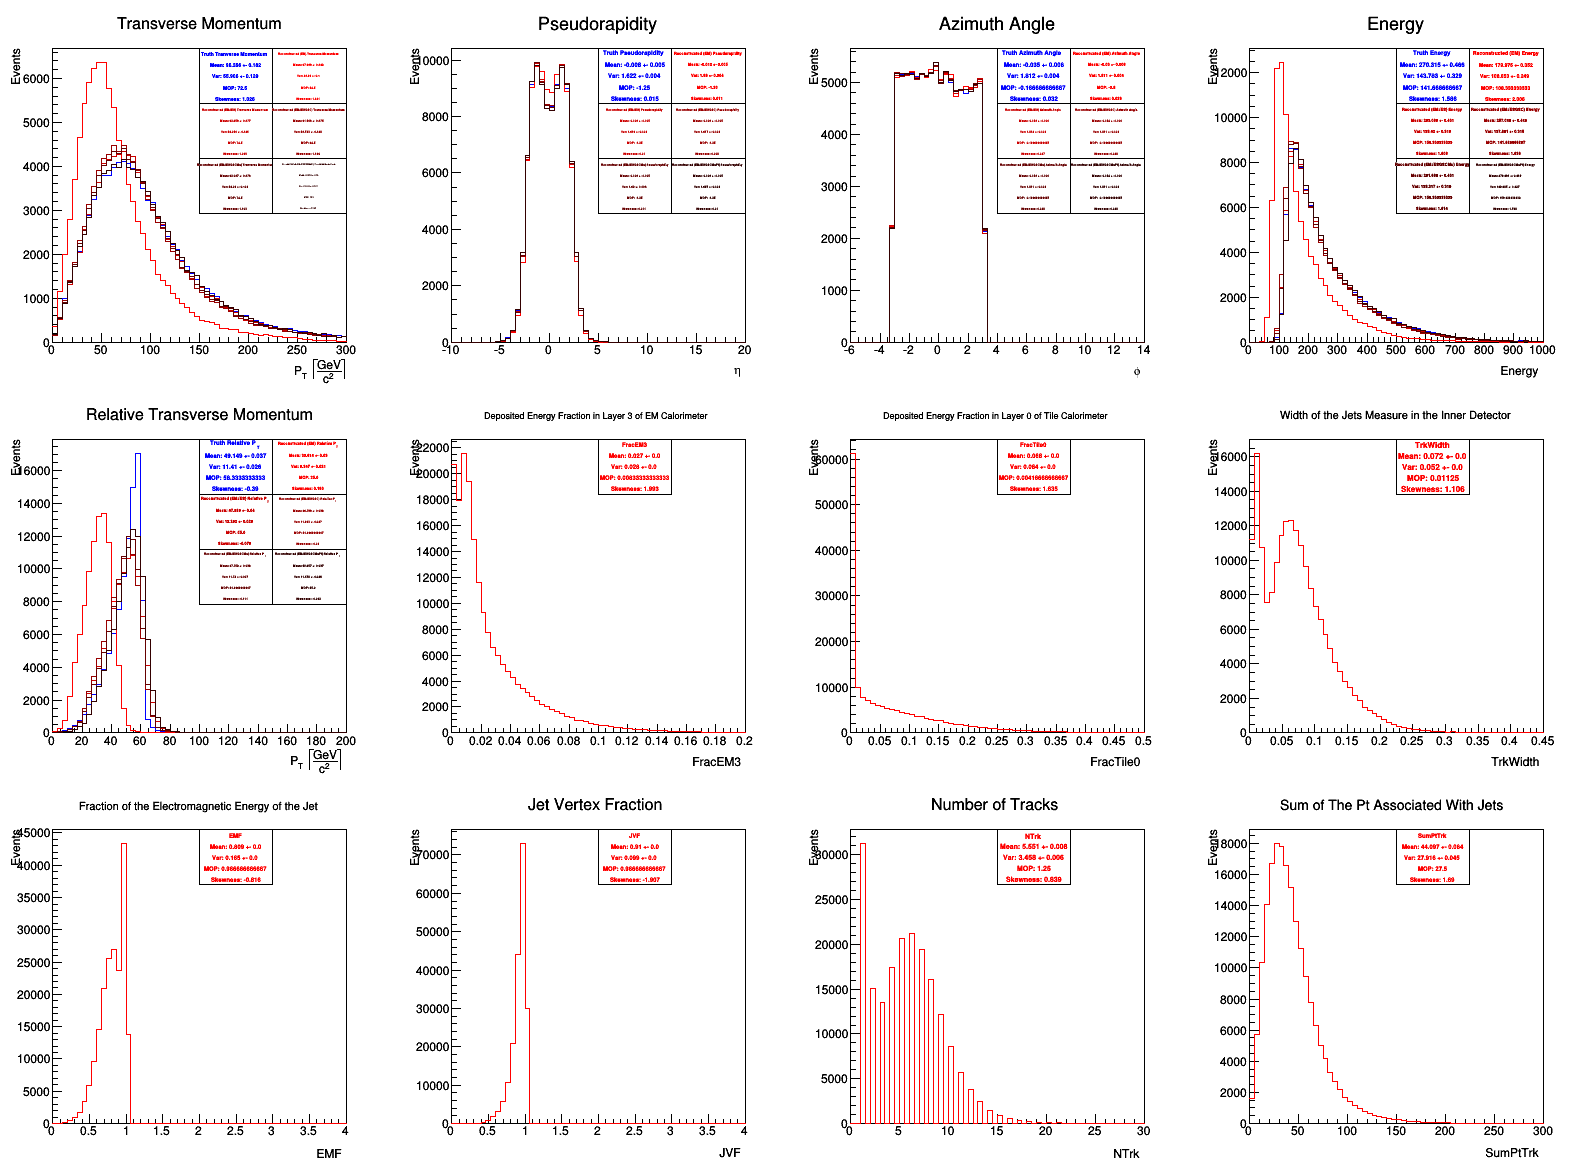

In [2]:

output = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results"

data_input = "/home/isabella/Workspace/Adrian2015/Public/WH/output/local/readPaul_1_0_J1Pt45+2BTag+TruthGENWZ+Clean_1_perevent+perjet/lvbb125.root"
treeName = "perevent"

file = ROOT.TFile(data_input,"READ")
tree = file.Get(treeName)

nrEvents = tree.GetEntries()
#nrEvents = 4

# for histograms
bins = 60
m_max = 300
m_min = 0

ylabel = "Occurrences"

# Use Colors
list_color = []
list_color.append(ROOT.kBlue) # For truth
list_color.append(ROOT.kRed) 
list_color.append(ROOT.kRed+1)
list_color.append(ROOT.kRed+2)
list_color.append(ROOT.kRed+3)
list_color.append(ROOT.kRed+4)
#end list of colors

#  Make a list of pt histogram
list_inf_pt = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth Tranverse Momentum ","h_pt_truth",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
list_inf_pt.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EM) Tranverse Momentum ","h_pt_EM",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
list_inf_pt.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJES) Tranverse Momentum ","h_pt_EMJES",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
list_inf_pt.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSC) Tranverse Momentum ","h_pt_EMJESGSC",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
list_inf_pt.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMu) Tranverse Momentum ","h_pt_EMJESGSCMu",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
list_inf_pt.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMuPt) Tranverse Momentum ","h_pt_EMJESGSCMuPt",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
list_inf_pt.append(hist_inf)

list_hist_pt = HistogramFunctions.CreateListOf1DHistograms(list_inf_pt,list_color)
# end

# Make a list of Eta histogram
m_min = -10
m_max = 20
list_inf_eta = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth Pseudorapidity ","h_Eta_truth",bins,m_min,m_max," #eta ",ylabel)
list_inf_eta.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EM) Pseudorapidity","h_Eta_EM",bins,m_min,m_max," #eta ",ylabel)
list_inf_eta.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJES) Pseudorapidity","h_Eta_EMJES",bins,m_min,m_max," #eta ",ylabel)
list_inf_eta.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSC) Pseudorapidity","h_Eta_EMJESGSC",bins,m_min,m_max," #eta ",ylabel)
list_inf_eta.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMu) Pseudorapidity","h_Eta_EMJESGSCMu",bins,m_min,m_max," #eta ",ylabel)
list_inf_eta.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMuPt) Pseudorapidity","h_Eta_EMJESGSCMuPt",bins,m_min,m_max," #eta ",ylabel)
list_inf_eta.append(hist_inf)

list_hist_eta = HistogramFunctions.CreateListOf1DHistograms(list_inf_eta,list_color)
# end

# Make a list of Phi Histogram
m_min = -6
m_max = 14
list_inf_phi = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth Azimuth Angle ","h_Phi_truth",bins,m_min,m_max," #phi ",ylabel)
list_inf_phi.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EM) Azimuth Angle ","h_Phi_EM",bins,m_min,m_max," #phi ",ylabel)
list_inf_phi.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJES) Azimuth Angle ","h_Phi_EMJES",bins,m_min,m_max," #phi ",ylabel)
list_inf_phi.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSC) Azimuth Angle ","h_Phi_EMJESGSC",bins,m_min,m_max," #phi ",ylabel)
list_inf_phi.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMu) Azimuth Angle ","h_Phi_EMJESGSCMu",bins,m_min,m_max," #phi ",ylabel)
list_inf_phi.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMuPt) Azimuth Angle ","h_Phi_EMJESGSCMuPt",bins,m_min,m_max," #phi ",ylabel)
list_inf_phi.append(hist_inf)

list_hist_phi = HistogramFunctions.CreateListOf1DHistograms(list_inf_phi,list_color)
# end

# Make a list of Energy Histogram
m_min = 0
m_max = 1000
list_inf_E = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth Energy","h_E_truth",bins,m_min,m_max," Energy ",ylabel)
list_inf_E.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EM) Energy","h_E_EM",bins,m_min,m_max," Energy ",ylabel)
list_inf_E.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJES) Energy","h_E_EMJES",bins,m_min,m_max," Energy ",ylabel)
list_inf_E.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSC) Energy","h_E_EMJESGSC",bins,m_min,m_max," Energy ",ylabel)
list_inf_E.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMu) Energy","h_E_EMJESGSCMu",bins,m_min,m_max," Energy ",ylabel)
list_inf_E.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMuPt) Energy","h_E_EMJESGSCMuPt",bins,m_min,m_max," Energy ",ylabel)
list_inf_E.append(hist_inf)

list_hist_E = HistogramFunctions.CreateListOf1DHistograms(list_inf_E,list_color)
# end

# Make a list of Relative Pt Histogram
m_min = 0
m_max = 200
list_inf_PtRel = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth Relative P_{T}","h_PtRel_truth",bins,m_min,m_max," Relative P_{T} #left[#frac{GeV}{c^{2}}#right] ",ylabel)
list_inf_PtRel.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EM) Relative P_{T}","h_PtRel_EM",bins,m_min,m_max," Relative P_{T} #left[#frac{GeV}{c^{2}}#right] ",ylabel)
list_inf_PtRel.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJES) Relative P_{T}","h_PtRel_EMJES",bins,m_min,m_max," Relative P_{T} #left[#frac{GeV}{c^{2}}#right] ",ylabel)
list_inf_PtRel.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSC) Relative P_{T}","h_PtRel_EMJESGSC",bins,m_min,m_max," Relative P_{T} #left[#frac{GeV}{c^{2}}#right] ",ylabel)
list_inf_PtRel.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMu) Relative P_{T}","h_PtRel_EMJESGSCMu",bins,m_min,m_max," Relative P_{T} #left[#frac{GeV}{c^{2}}#right] ",ylabel)
list_inf_PtRel.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMuPt) Relative P_{T}","h_PtRel_EMJESGSCMuPt",bins,m_min,m_max," Relative P_{T} #left[#frac{GeV}{c^{2}}#right] ",ylabel)
list_inf_PtRel.append(hist_inf)

list_hist_PtRel = HistogramFunctions.CreateListOf1DHistograms(list_inf_PtRel,list_color)
# end

# histogram for FracEM3

m_mim = -.05
m_max = 0.20
list_inf_FracEM3 = []
aux_color = []
aux_color.append(ROOT.kRed)

hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("FracEM3","h_FracEM3",bins,m_min,m_max," FracEM3 ",ylabel)
list_inf_FracEM3.append(hist_inf)

list_hist_FracEM3 = HistogramFunctions.CreateListOf1DHistograms(list_inf_FracEM3,aux_color)
# end

# histogram for FracTile0

m_mim = -.05
m_max = 0.50
list_inf_FracTile0 = []

hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("FracTile0","h_FracTile0",bins,m_min,m_max," FracTile0 ",ylabel)
list_inf_FracTile0.append(hist_inf)

list_hist_FracTile0 = HistogramFunctions.CreateListOf1DHistograms(list_inf_FracTile0,aux_color)
# end

# histogram for TrkWidth

m_mim = 0
m_max = 0.45
list_inf_TrkWidth = []

hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("TrkWidth","h_TrkWidth",bins,m_min,m_max," TrkWidth ",ylabel)
list_inf_TrkWidth.append(hist_inf)

list_hist_TrkWidth = HistogramFunctions.CreateListOf1DHistograms(list_inf_TrkWidth,aux_color)
# end

# histogram for EMF

m_mim = 0
m_max = 4
list_inf_EMF = []

hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("EMF","h_EMF",bins,m_min,m_max," EMF ",ylabel)
list_inf_EMF.append(hist_inf)

list_hist_EMF = HistogramFunctions.CreateListOf1DHistograms(list_inf_EMF,aux_color)
# end

# histogram for JVF

m_mim = 0
m_max = 4
list_inf_JVF = []

hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("JVF","h_JVF",bins,m_min,m_max," JVF ",ylabel)
list_inf_JVF.append(hist_inf)

list_hist_JVF = HistogramFunctions.CreateListOf1DHistograms(list_inf_JVF,aux_color)
# end

# histogram for NTrk

m_mim = 0
m_max = 30
list_inf_NTrk = []

hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("NTrk","h_NTrk",bins,m_min,m_max," NTrk ",ylabel)
list_inf_NTrk.append(hist_inf)

list_hist_NTrk = HistogramFunctions.CreateListOf1DHistograms(list_inf_NTrk,aux_color)
# end

# histogram for SumPtTrk

m_mim = 0
m_max = 300
list_inf_SumPtTrk = []

hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("SumPtTrk","h_SumPtTrk",bins,m_min,m_max," SumPtTrk ",ylabel)
list_inf_SumPtTrk.append(hist_inf)

list_hist_SumPtTrk = HistogramFunctions.CreateListOf1DHistograms(list_inf_SumPtTrk,aux_color)
# end

Corrections = ["GENWZ","EM","EMJES","EMJESGSC","EMJESGSCMu","EMJESGSCMuPt"]

for (j,Correction) in enumerate(Corrections):
    for (i,entry) in enumerate(tree):
        if nrEvents>0:
            if i>nrEvents:
                break
        # variables for j1.     
        E1 = getattr(entry,"j1_"+Correction+"_E")
        Eta1 = getattr(entry,"j1_"+Correction+"_Eta")
        Phi1 = getattr(entry,"j1_"+Correction+"_Phi")
        Pt1 = getattr(entry,"j1_"+Correction+"_Pt")
    
        Theta1 = AuxiliarFunctions.theta(Eta1)
        Comp1 = AuxiliarFunctions.Componets(E1,Eta1,Phi1,Theta1)
        norm1 = AuxiliarFunctions.norm(Comp1)
    
        # variables for j2.     
        E2 = getattr(entry,"j2_"+Correction+"_E")
        Eta2 = getattr(entry,"j2_"+Correction+"_Eta")
        Phi2 = getattr(entry,"j2_"+Correction+"_Phi")
        Pt2 = getattr(entry,"j2_"+Correction+"_Pt")
    
        Theta2 = AuxiliarFunctions.theta(Eta2)
        Comp2 = AuxiliarFunctions.Componets(E2,Eta2,Phi2,Theta2)
        norm2 = AuxiliarFunctions.norm(Comp2)
    
        # sum of components.
        Comp3 = AuxiliarFunctions.somaComponents(Comp1,Comp2)
        norm3 = AuxiliarFunctions.norm(Comp3)
        numerador1 = AuxiliarFunctions.numerador(Comp1,Comp3)
    
        angle1 = AuxiliarFunctions.alpha(numerador1,norm1,norm3)
    
        #compute Relative Pt
        PtRel_j1 = AuxiliarFunctions.PtRelative(E1,angle1)
        # Fill histograms
        list_hist_PtRel[j].Fill(PtRel_j1)
        
        # fill the histograms of Pt
        list_hist_pt[j].Fill(getattr(entry,"j1j2_"+Correction+"_Pt"))
        # fill the histograms of Eta
        list_hist_eta[j].Fill(getattr(entry,"j1j2_"+Correction+"_Eta"))
        # fill the histogram of Phi
        list_hist_phi[j].Fill(getattr(entry,"j1j2_"+Correction+"_Phi"))
        # fill the histogram of Energy
        list_hist_E[j].Fill(getattr(entry,"j1j2_"+Correction+"_E"))
        
        
        
for (i,entry) in enumerate(tree):
    if nrEvents>0:
        if i>nrEvents:
            break
    # fill the histogram of FracEM3
    j1_FracEM3 = (getattr(entry,"j1_FracEM3"))
    j2_FracEM3 = (getattr(entry,"j2_FracEM3"))
    list_hist_FracEM3[0].Fill(j1_FracEM3)
    list_hist_FracEM3[0].Fill(j2_FracEM3)
    # fill the histogram of FracTile0
    j1_FracTile0 = (getattr(entry,"j1_FracTile0"))
    j2_FracTile0 =(getattr(entry,"j2_FracTile0"))
    list_hist_FracTile0[0].Fill(j1_FracTile0)
    list_hist_FracTile0[0].Fill(j2_FracTile0)
    # fill the histogram of TrkWidth
    j1_TrkWidth = (getattr(entry,"j1_TrkWidth"))
    j2_TrkWidth = (getattr(entry,"j2_TrkWidth"))
    list_hist_TrkWidth[0].Fill(j1_TrkWidth)
    list_hist_TrkWidth[0].Fill(j2_TrkWidth)
    # fill the hitogram of EMF
    j1_EMF = (getattr(entry,"j1_EMF"))
    j2_EMF = (getattr(entry,"j2_EMF"))
    list_hist_EMF[0].Fill(j1_EMF)
    list_hist_EMF[0].Fill(j2_EMF)
    # fill the histogram of JVF
    j1_JVF = (getattr(entry,"j1_JVF"))
    j2_JVF = (getattr(entry,"j2_JVF"))
    list_hist_JVF[0].Fill(j1_JVF)
    list_hist_JVF[0].Fill(j2_JVF)
    # fill the histogram of NTrk
    j1_NTrk = (getattr(entry,"j1_NTrk"))
    j2_NTrk = (getattr(entry,"j2_NTrk"))
    list_hist_NTrk[0].Fill(j1_NTrk)
    list_hist_NTrk[0].Fill(j2_NTrk)
    # fill the histogram of SumPtTrk
    j1_SumPtTrk = (getattr(entry,"j1_SumPtTrk"))
    j2_SumPtTrk = (getattr(entry,"j2_SumPtTrk"))
    list_hist_SumPtTrk[0].Fill(j1_SumPtTrk)
    list_hist_SumPtTrk[0].Fill(j2_SumPtTrk)
    
    
# Draw histograms
HistogramFunctions.Draw1DHists(list_hist_pt,output)
HistogramFunctions.Draw1DHists(list_hist_eta,output)
HistogramFunctions.Draw1DHists(list_hist_phi,output)
HistogramFunctions.Draw1DHists(list_hist_E,output)
# Relative Pt
HistogramFunctions.Draw1DHists(list_hist_PtRel,output)    
# FracEM3, FracTile0, TrkWidth, EMF, JVF, NTrk, SumPtTrk
HistogramFunctions.Draw1DHists(list_hist_FracEM3,output)    
HistogramFunctions.Draw1DHists(list_hist_FracTile0,output)    
HistogramFunctions.Draw1DHists(list_hist_TrkWidth,output)
HistogramFunctions.Draw1DHists(list_hist_EMF,output)
HistogramFunctions.Draw1DHists(list_hist_JVF,output)
HistogramFunctions.Draw1DHists(list_hist_NTrk,output)
HistogramFunctions.Draw1DHists(list_hist_SumPtTrk,output)

# make clone lists for draw all histograms in subcanvas
clone_list_pt = []
for hist in list_hist_pt:
    newhist = hist.Clone()
    clone_list_pt.append(newhist)  
    
clone_list_eta = []
for hist in list_hist_eta:
    newhist = hist.Clone()
    clone_list_eta.append(newhist)  
    
clone_list_phi = []
for hist in list_hist_phi:
    newhist = hist.Clone()
    clone_list_phi.append(newhist)

clone_list_E = []
for hist in list_hist_E:
    newhist = hist.Clone()
    clone_list_E.append(newhist)

clone_list_PtRel = []
for hist in list_hist_PtRel:
    newhist = hist.Clone()
    clone_list_PtRel.append(newhist)
    
clone_list_FracEM3 = []
for hist in list_hist_FracEM3:
    newhist = hist.Clone()
    clone_list_FracEM3.append(newhist)
    
clone_list_FracTile0 = []
for hist in list_hist_FracTile0:
    newhist = hist.Clone()
    clone_list_FracTile0.append(newhist)

clone_list_TrkWidth = []
for hist in list_hist_TrkWidth:
    newhist = hist.Clone()
    clone_list_TrkWidth.append(newhist)

clone_list_EMF = []
for hist in list_hist_EMF:
    newhist = hist.Clone()
    clone_list_EMF.append(newhist)

clone_list_JVF = []
for hist in list_hist_JVF:
    newhist = hist.Clone()
    clone_list_JVF.append(newhist)

clone_list_NTrk = []
for hist in list_hist_NTrk:
    newhist = hist.Clone()
    clone_list_NTrk.append(newhist)

clone_list_SumPtTrk = []
for hist in list_hist_SumPtTrk:
    newhist = hist.Clone()
    clone_list_SumPtTrk.append(newhist)

    
c1 = rootnotes.canvas("c1", (1600, 1200))

c1.Divide(4,3)
a = c1.cd(1)
b = c1.cd(2)
c = c1.cd(3)
d = c1.cd(4)
# Relative Pt SubCanvas
e = c1.cd(5)
# FracEM3, FracTile0, TrkWidth, EMF, JVF, NTrk, SumPtTrk SubCanvas
f = c1.cd(6)
g = c1.cd(7)
h = c1.cd(8)
i = c1.cd(9)
j = c1.cd(10)
k = c1.cd(11)
l = c1.cd(12)

HistogramFunctions.DrawList1DHistInCanvas(clone_list_pt, "Transverse Momentum", "P_{T} #left[#frac{GeV}{c^{2}}#right]", "Events", a)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_eta, "Pseudorapidity", " #eta ", "Events", b)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_phi, "Azimuth Angle", " #phi ", "Events", c)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_E, "Energy", " Energy ", "Events", d)
# Relative Pt 
HistogramFunctions.DrawList1DHistInCanvas(clone_list_PtRel, "Relative Transverse Momentum", " P_{T} #left[#frac{GeV}{c^{2}}#right] ", "Events", e)
# FracEM3, FracTile0, TrkWidth, EMF, JVF, NTrk, SumPtTrk
HistogramFunctions.DrawList1DHistInCanvas(clone_list_FracEM3, "Deposited Energy Fraction in Layer 3 of EM Calorimeter ", " FracEM3 ", "Events", f)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_FracTile0, "Deposited Energy Fraction in Layer 0 of Tile Calorimeter ", " FracTile0 ", "Events", g)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_TrkWidth, "Width of the Jets Measure in the Inner Detector", " TrkWidth ", "Events", h)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_EMF, "Fraction of the Electromagnetic Energy of the Jet", " EMF ", "Events", i)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_JVF, "Jet Vertex Fraction ", " JVF ", "Events", j)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_NTrk, "Number of Tracks ", " NTrk ", "Events", k)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_SumPtTrk, "Sum of The Pt Associated With Jets  ", " SumPtTrk ", "Events", l)
c1.Print(output+"/"+"AllLevels.pdf")
# Show de Canvas in output
c1


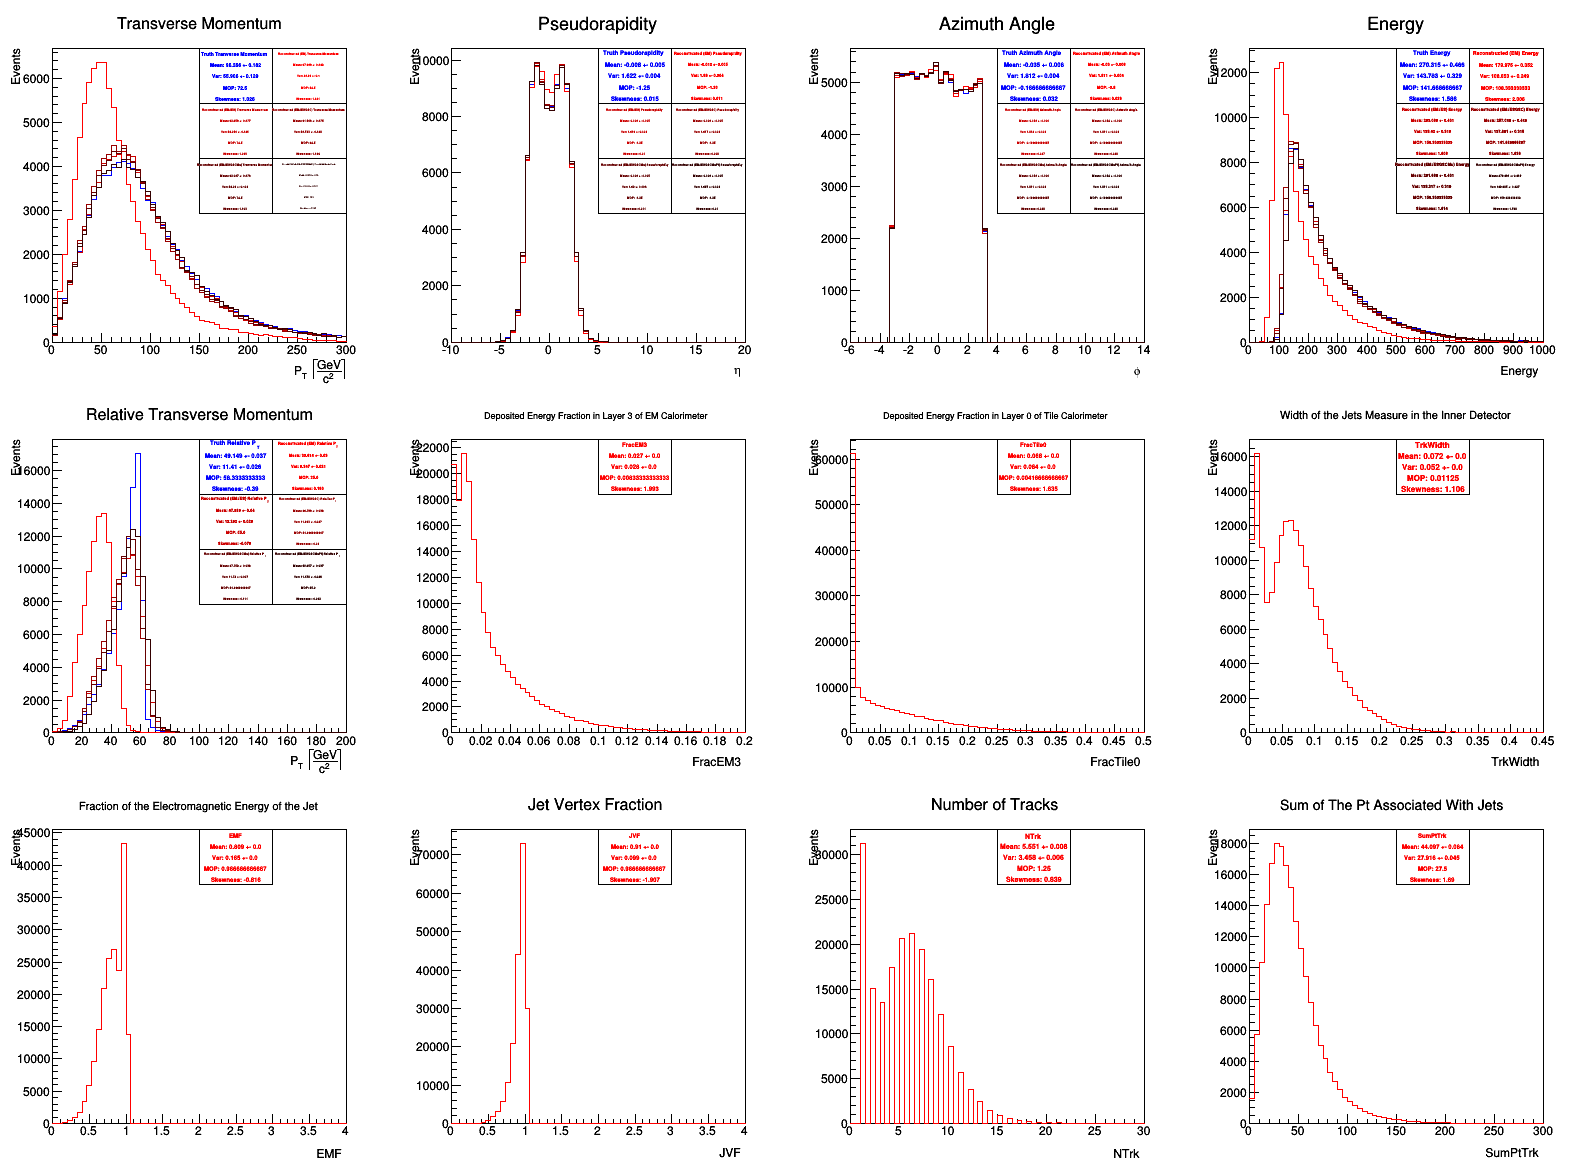

In [3]:
c1.Print(output+"/"+"AllLevels.pdf")

c2 = rootnotes.canvas("c2", (800, 600))
HistogramFunctions.DrawList1DHistInCanvas(clone_list_pt, "Transverse Momentum", "P_{T} #left[#frac{GeV}{c^{2}}#right]", "Events", c2)

c3 = rootnotes.canvas("c3", (800, 600))
HistogramFunctions.DrawList1DHistInCanvas(clone_list_eta, "Pseudorapidity", " #eta ", "Events", c3)

c4 = rootnotes.canvas("c4", (800, 600))
HistogramFunctions.DrawList1DHistInCanvas(clone_list_phi, "Azimuth Angle", " #phi ", "Events", c4)

c5 = rootnotes.canvas("c5", (800, 600))
HistogramFunctions.DrawList1DHistInCanvas(clone_list_E, "Energy", " Energy ", "Events", c5)

# Relative Pt 
c6 = rootnotes.canvas("c6", (800, 600))
HistogramFunctions.DrawList1DHistInCanvas(clone_list_PtRel, "Relative Transverse Momentum", " P_{T} #left[#frac{GeV}{c^{2}}#right] ", "Events", c6)

c2.Print(output+"/"+"PtAll.pdf")
c3.Print(output+"/"+"EtaAll.pdf")
c4.Print(output+"/"+"PhiAll.pdf")
c5.Print(output+"/"+"EAll.pdf")
c6.Print(output+"/"+"PtRelAll.pdf")
c1

In [2]:
processes = "lvbb125,TTbar,Wbb,Wbl,Wll,Wcl,Wcc,WW,WZ,ZZ"
#processes = "ZZ"
output = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results/Plots"

data_path = "/home/isabella/Workspace/Adrian2015/Public/WH/output/local/readPaul_1_0_J1Pt45+2BTag+TruthGENWZ+Clean_1_perevent+perjet"




#nrEvents = 10

ylabel = "Occurrences"


for process in processes.split(","):
    data_input = data_path+"/"+process+".root"
    treeName = "perevent"
    file = ROOT.TFile(data_input,"READ")
    tree = file.Get(treeName)
    nrEvents = tree.GetEntries()

    # Use Colors
    list_color = []
    list_color.append(ROOT.kBlue) # For truth
    list_color.append(ROOT.kRed) 
    list_color.append(ROOT.kRed+1)
    list_color.append(ROOT.kRed+2)
    list_color.append(ROOT.kRed+3)
    list_color.append(ROOT.kRed+4)
    #end list of colors

    # for histograms
    bins = 90
    m_max = 450
    m_min = 0

    #  Make a list of pt histogram
    list_inf_pt = []

    hist_inf = HistogramFunctions.OneDimHistInfo("Truth Tranverse Momentum ","h_"+process+"_pt_truth",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
    list_inf_pt.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EM) Tranverse Momentum ","h_"+process+"_pt_EM",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
    list_inf_pt.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJES) Tranverse Momentum ","h_"+process+"_pt_EMJES",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
    list_inf_pt.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSC) Tranverse Momentum ","h_"+process+"_pt_EMJESGSC",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
    list_inf_pt.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMu) Tranverse Momentum ","h_"+process+"_pt_EMJESGSCMu",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
    list_inf_pt.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMuPt) Tranverse Momentum ","h_"+process+"_pt_EMJESGSCMuPt",bins,m_min,m_max,"P_{T} #left[#frac{GeV}{c^{2}}#right]",ylabel)
    list_inf_pt.append(hist_inf)

    list_hist_pt = HistogramFunctions.CreateListOf1DHistograms(list_inf_pt,list_color)
    # end

    # Make a list of Eta histogram
    bins = 60
    m_min = -10
    m_max = 20
    list_inf_eta = []

    hist_inf = HistogramFunctions.OneDimHistInfo("Truth Pseudorapidity ","h_"+process+"_Eta_truth",bins,m_min,m_max," #eta ",ylabel)
    list_inf_eta.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EM) Pseudorapidity","h_"+process+"_Eta_EM",bins,m_min,m_max," #eta ",ylabel)
    list_inf_eta.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJES) Pseudorapidity","h_"+process+"_Eta_EMJES",bins,m_min,m_max," #eta ",ylabel)
    list_inf_eta.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSC) Pseudorapidity","h_"+process+"_Eta_EMJESGSC",bins,m_min,m_max," #eta ",ylabel)
    list_inf_eta.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMu) Pseudorapidity","h_"+process+"_Eta_EMJESGSCMu",bins,m_min,m_max," #eta ",ylabel)
    list_inf_eta.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMuPt) Pseudorapidity","h_"+process+"_Eta_EMJESGSCMuPt",bins,m_min,m_max," #eta ",ylabel)
    list_inf_eta.append(hist_inf)

    list_hist_eta = HistogramFunctions.CreateListOf1DHistograms(list_inf_eta,list_color)
    # end

    # Make a list of Phi Histogram
    m_min = -6
    m_max = 14
    list_inf_phi = []

    hist_inf = HistogramFunctions.OneDimHistInfo("Truth Azimuth Angle ","h_"+process+"_Phi_truth",bins,m_min,m_max," #phi ",ylabel)
    list_inf_phi.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EM) Azimuth Angle ","h_"+process+"_Phi_EM",bins,m_min,m_max," #phi ",ylabel)
    list_inf_phi.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJES) Azimuth Angle ","h_"+process+"_Phi_EMJES",bins,m_min,m_max," #phi ",ylabel)
    list_inf_phi.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSC) Azimuth Angle ","h_"+process+"_Phi_EMJESGSC",bins,m_min,m_max," #phi ",ylabel)
    list_inf_phi.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMu) Azimuth Angle ","h_"+process+"_Phi_EMJESGSCMu",bins,m_min,m_max," #phi ",ylabel)
    list_inf_phi.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMuPt) Azimuth Angle ","h_"+process+"_Phi_EMJESGSCMuPt",bins,m_min,m_max," #phi ",ylabel)
    list_inf_phi.append(hist_inf)

    list_hist_phi = HistogramFunctions.CreateListOf1DHistograms(list_inf_phi,list_color)
    # end

    # Make a list of Energy Histogram
    bins = 240
    m_min = 0
    m_max = 1200
    list_inf_E = []

    hist_inf = HistogramFunctions.OneDimHistInfo("Truth Energy","h_"+process+"_E_truth",bins,m_min,m_max," Energy ",ylabel)
    list_inf_E.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EM) Energy","h_"+process+"_E_EM",bins,m_min,m_max," Energy ",ylabel)
    list_inf_E.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJES) Energy","h_"+process+"_E_EMJES",bins,m_min,m_max," Energy ",ylabel)
    list_inf_E.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSC) Energy","h_"+process+"_E_EMJESGSC",bins,m_min,m_max," Energy ",ylabel)
    list_inf_E.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMu) Energy","h_"+process+"_E_EMJESGSCMu",bins,m_min,m_max," Energy ",ylabel)
    list_inf_E.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMuPt) Energy","h_"+process+"_E_EMJESGSCMuPt",bins,m_min,m_max," Energy ",ylabel)
    list_inf_E.append(hist_inf)
    
    list_hist_E = HistogramFunctions.CreateListOf1DHistograms(list_inf_E,list_color)
    # end

    # Make a list of Relative Pt Histogram
    bins = 40
    m_min = 0
    m_max = 200
    list_inf_PtRel = []

    hist_inf = HistogramFunctions.OneDimHistInfo("Truth Relative P_{T}","h_"+process+"_PtRel_truth",bins,m_min,m_max," Relative P_{T} #left[#frac{GeV}{c^{2}}#right] ",ylabel)
    list_inf_PtRel.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EM) Relative P_{T}","h_"+process+"_PtRel_EM",bins,m_min,m_max," Relative P_{T} #left[#frac{GeV}{c^{2}}#right] ",ylabel)
    list_inf_PtRel.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJES) Relative P_{T}","h_"+process+"_PtRel_EMJES",bins,m_min,m_max," Relative P_{T} #left[#frac{GeV}{c^{2}}#right] ",ylabel)
    list_inf_PtRel.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSC) Relative P_{T}","h_"+process+"_PtRel_EMJESGSC",bins,m_min,m_max," Relative P_{T} #left[#frac{GeV}{c^{2}}#right] ",ylabel)
    list_inf_PtRel.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMu) Relative P_{T}","h_"+process+"_PtRel_EMJESGSCMu",bins,m_min,m_max," Relative P_{T} #left[#frac{GeV}{c^{2}}#right] ",ylabel)
    list_inf_PtRel.append(hist_inf)

    hist_inf = HistogramFunctions.OneDimHistInfo("Reconstructed (EMJESGSCMuPt) Relative P_{T}","h_"+process+"_PtRel_EMJESGSCMuPt",bins,m_min,m_max," Relative P_{T} #left[#frac{GeV}{c^{2}}#right] ",ylabel)
    list_inf_PtRel.append(hist_inf)

    list_hist_PtRel = HistogramFunctions.CreateListOf1DHistograms(list_inf_PtRel,list_color)
    # end

    # histogram for FracEM3
    bins = 60
    m_mim = -0.5
    m_max = 0.20
    list_inf_FracEM3 = []
    aux_color = []
    aux_color.append(ROOT.kRed)

    hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("FracEM3","h_"+process+"_FracEM3",bins,m_min,m_max," FracEM3 ",ylabel)
    list_inf_FracEM3.append(hist_inf)

    list_hist_FracEM3 = HistogramFunctions.CreateListOf1DHistograms(list_inf_FracEM3,aux_color)
    # end

    # histogram for FracTile0

    m_mim = -0.5
    m_max = 0.50
    list_inf_FracTile0 = []

    hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("FracTile0","h_"+process+"_FracTile0",bins,m_min,m_max," FracTile0 ",ylabel)
    list_inf_FracTile0.append(hist_inf)

    list_hist_FracTile0 = HistogramFunctions.CreateListOf1DHistograms(list_inf_FracTile0,aux_color)
    # end

    # histogram for TrkWidth

    m_mim = 0
    m_max = 0.45
    list_inf_TrkWidth = []

    hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("TrkWidth","h_"+process+"_TrkWidth",bins,m_min,m_max," TrkWidth ",ylabel)
    list_inf_TrkWidth.append(hist_inf)

    list_hist_TrkWidth = HistogramFunctions.CreateListOf1DHistograms(list_inf_TrkWidth,aux_color)
    # end

    # histogram for EMF

    m_mim = 0
    m_max = 3
    list_inf_EMF = []

    hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("EMF","h_"+process+"_EMF",bins,m_min,m_max," EMF ",ylabel)
    list_inf_EMF.append(hist_inf)

    list_hist_EMF = HistogramFunctions.CreateListOf1DHistograms(list_inf_EMF,aux_color)
    # end

    # histogram for JVF

    m_mim = 0
    m_max = 3
    list_inf_JVF = []

    hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("JVF","h_"+process+"_JVF",bins,m_min,m_max," JVF ",ylabel)
    list_inf_JVF.append(hist_inf)

    list_hist_JVF = HistogramFunctions.CreateListOf1DHistograms(list_inf_JVF,aux_color)
    # end

    # histogram for NTrk

    m_mim = 0
    m_max = 30
    list_inf_NTrk = []

    hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("NTrk","h_"+process+"_NTrk",bins,m_min,m_max," NTrk ",ylabel)
    list_inf_NTrk.append(hist_inf)

    list_hist_NTrk = HistogramFunctions.CreateListOf1DHistograms(list_inf_NTrk,aux_color)
    # end

    # histogram for SumPtTrk

    m_mim = 0
    m_max = 300
    list_inf_SumPtTrk = []

    hist_inf = hist_inf = HistogramFunctions.OneDimHistInfo("SumPtTrk","h_"+process+"_SumPtTrk",bins,m_min,m_max," SumPtTrk ",ylabel)
    list_inf_SumPtTrk.append(hist_inf)

    list_hist_SumPtTrk = HistogramFunctions.CreateListOf1DHistograms(list_inf_SumPtTrk,aux_color)
    # end

    Corrections = ["GENWZ","EM","EMJES","EMJESGSC","EMJESGSCMu","EMJESGSCMuPt"]

    for (j,Correction) in enumerate(Corrections):
        for (i,entry) in enumerate(tree):
            if nrEvents>0:
                if i>nrEvents:
                    break
            # variables for j1.     
            E1 = getattr(entry,"j1_"+Correction+"_E")
            Eta1 = getattr(entry,"j1_"+Correction+"_Eta")
            Phi1 = getattr(entry,"j1_"+Correction+"_Phi")
            Pt1 = getattr(entry,"j1_"+Correction+"_Pt")
        
            Theta1 = AuxiliarFunctions.theta(Eta1)
            Comp1 = AuxiliarFunctions.Componets(E1,Eta1,Phi1,Theta1)
            norm1 = AuxiliarFunctions.norm(Comp1)
    
            # variables for j2.     
            E2 = getattr(entry,"j2_"+Correction+"_E")
            Eta2 = getattr(entry,"j2_"+Correction+"_Eta")
            Phi2 = getattr(entry,"j2_"+Correction+"_Phi")
            Pt2 = getattr(entry,"j2_"+Correction+"_Pt")
    
            Theta2 = AuxiliarFunctions.theta(Eta2)
            Comp2 = AuxiliarFunctions.Componets(E2,Eta2,Phi2,Theta2)
            norm2 = AuxiliarFunctions.norm(Comp2)
    
            # sum of components.
            Comp3 = AuxiliarFunctions.somaComponents(Comp1,Comp2)
            norm3 = AuxiliarFunctions.norm(Comp3)
            numerador1 = AuxiliarFunctions.numerador(Comp1,Comp3)
    
            angle1 = AuxiliarFunctions.alpha(numerador1,norm1,norm3)
    
            #compute Relative Pt
            PtRel_j1 = AuxiliarFunctions.PtRelative(E1,angle1)
            # Fill histograms
            list_hist_PtRel[j].Fill(PtRel_j1)
            list_hist_PtRel[j].Fill(PtRel_j1)
        
            # fill the histograms of Pt
            list_hist_pt[j].Fill(getattr(entry,"j1_"+Correction+"_Pt"))
            list_hist_pt[j].Fill(getattr(entry,"j2_"+Correction+"_Pt"))
            # fill the histograms of Eta
            list_hist_eta[j].Fill(getattr(entry,"j1_"+Correction+"_Eta"))
            list_hist_eta[j].Fill(getattr(entry,"j2_"+Correction+"_Eta"))
            # fill the histogram of Phi
            list_hist_phi[j].Fill(getattr(entry,"j1_"+Correction+"_Phi"))
            list_hist_phi[j].Fill(getattr(entry,"j2_"+Correction+"_Phi"))
            # fill the histogram of Energy
            list_hist_E[j].Fill(getattr(entry,"j1_"+Correction+"_E"))
            list_hist_E[j].Fill(getattr(entry,"j2_"+Correction+"_E"))
        
        
        
    for (i,entry) in enumerate(tree):
        if nrEvents>0:
            if i>nrEvents:
                break
        # fill the histogram of FracEM3
        j1_FracEM3 = (getattr(entry,"j1_FracEM3"))
        j2_FracEM3 = (getattr(entry,"j2_FracEM3"))
        list_hist_FracEM3[0].Fill(j1_FracEM3)
        list_hist_FracEM3[0].Fill(j2_FracEM3)
        # fill the histogram of FracTile0
        j1_FracTile0 = (getattr(entry,"j1_FracTile0"))
        j2_FracTile0 =(getattr(entry,"j2_FracTile0"))
        list_hist_FracTile0[0].Fill(j1_FracTile0)
        list_hist_FracTile0[0].Fill(j2_FracTile0)
        # fill the histogram of TrkWidth
        j1_TrkWidth = (getattr(entry,"j1_TrkWidth"))
        j2_TrkWidth = (getattr(entry,"j2_TrkWidth"))
        list_hist_TrkWidth[0].Fill(j1_TrkWidth)
        list_hist_TrkWidth[0].Fill(j2_TrkWidth)
        # fill the hitogram of EMF
        j1_EMF = (getattr(entry,"j1_EMF"))
        j2_EMF = (getattr(entry,"j2_EMF"))
        list_hist_EMF[0].Fill(j1_EMF)
        list_hist_EMF[0].Fill(j2_EMF)
        # fill the histogram of JVF
        j1_JVF = (getattr(entry,"j1_JVF"))
        j2_JVF = (getattr(entry,"j2_JVF"))
        list_hist_JVF[0].Fill(j1_JVF)
        list_hist_JVF[0].Fill(j2_JVF)
        # fill the histogram of NTrk
        j1_NTrk = (getattr(entry,"j1_NTrk"))
        j2_NTrk = (getattr(entry,"j2_NTrk"))
        list_hist_NTrk[0].Fill(j1_NTrk)
        list_hist_NTrk[0].Fill(j2_NTrk)
        # fill the histogram of SumPtTrk
        j1_SumPtTrk = (getattr(entry,"j1_SumPtTrk"))
        j2_SumPtTrk = (getattr(entry,"j2_SumPtTrk"))
        list_hist_SumPtTrk[0].Fill(j1_SumPtTrk)
        list_hist_SumPtTrk[0].Fill(j2_SumPtTrk)
    
    
    # Draw histograms
    HistogramFunctions.Draw1DHists(list_hist_pt,output)
    HistogramFunctions.Draw1DHists(list_hist_eta,output)
    HistogramFunctions.Draw1DHists(list_hist_phi,output)
    HistogramFunctions.Draw1DHists(list_hist_E,output)
    # Relative Pt
    HistogramFunctions.Draw1DHists(list_hist_PtRel,output)    
    # FracEM3, FracTile0, TrkWidth, EMF, JVF, NTrk, SumPtTrk
    HistogramFunctions.Draw1DHists(list_hist_FracEM3,output)    
    HistogramFunctions.Draw1DHists(list_hist_FracTile0,output)    
    HistogramFunctions.Draw1DHists(list_hist_TrkWidth,output)
    HistogramFunctions.Draw1DHists(list_hist_EMF,output)
    HistogramFunctions.Draw1DHists(list_hist_JVF,output)
    HistogramFunctions.Draw1DHists(list_hist_NTrk,output)
    HistogramFunctions.Draw1DHists(list_hist_SumPtTrk,output)

    # make clone lists for draw all histograms in subcanvas
    
    clone_list_pt = []
    for hist in list_hist_pt:
        newhist = hist.Clone()
        clone_list_pt.append(newhist)  
    
    clone_list_eta = []
    for hist in list_hist_eta:
        newhist = hist.Clone()
        clone_list_eta.append(newhist)  
    
    clone_list_phi = []
    for hist in list_hist_phi:
        newhist = hist.Clone()
        clone_list_phi.append(newhist)
    
    clone_list_E = []
    for hist in list_hist_E:
        newhist = hist.Clone()
        clone_list_E.append(newhist)
    
    clone_list_PtRel = []
    for hist in list_hist_PtRel:
        newhist = hist.Clone()
        clone_list_PtRel.append(newhist)
    
    clone_list_FracEM3 = []
    for hist in list_hist_FracEM3:
        newhist = hist.Clone()
        clone_list_FracEM3.append(newhist)
    
    clone_list_FracTile0 = []
    for hist in list_hist_FracTile0:
        newhist = hist.Clone()
        clone_list_FracTile0.append(newhist)
    
    clone_list_TrkWidth = []
    for hist in list_hist_TrkWidth:
        newhist = hist.Clone()
        clone_list_TrkWidth.append(newhist)
    
    clone_list_EMF = []
    for hist in list_hist_EMF:
        newhist = hist.Clone()
        clone_list_EMF.append(newhist)
    
    clone_list_JVF = []
    for hist in list_hist_JVF:
        newhist = hist.Clone()
        clone_list_JVF.append(newhist)
    
    clone_list_NTrk = []
    for hist in list_hist_NTrk:
        newhist = hist.Clone()
        clone_list_NTrk.append(newhist)
    
    clone_list_SumPtTrk = []
    for hist in list_hist_SumPtTrk:
        newhist = hist.Clone()
        clone_list_SumPtTrk.append(newhist)

    
    c1 = rootnotes.canvas("c1_"+process, (1600, 1200))
    c2 = rootnotes.canvas("c2_"+process, (800, 600))
    c3 = rootnotes.canvas("c3_"+process, (800, 600))
    c4 = rootnotes.canvas("c4_"+process, (800, 600))
    c5 = rootnotes.canvas("c5_"+process, (800, 600))
    c6 = rootnotes.canvas("c6_"+process, (800, 600))

    c1.Divide(4,3)
    a = c1.cd(1)
    b = c1.cd(2)
    c = c1.cd(3)
    d = c1.cd(4)
    # Relative Pt SubCanvas
    e = c1.cd(5)
    # FracEM3, FracTile0, TrkWidth, EMF, JVF, NTrk, SumPtTrk SubCanvas
    f = c1.cd(6)
    g = c1.cd(7)
    h = c1.cd(8)
    i = c1.cd(9)
    j = c1.cd(10)
    k = c1.cd(11)
    l = c1.cd(12)

    HistogramFunctions.DrawList1DHistInCanvas(clone_list_pt, "Transverse Momentum", "P_{T} #left[#frac{GeV}{c^{2}}#right]", "Events", a)
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_eta, "Pseudorapidity", " #eta ", "Events", b)
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_phi, "Azimuth Angle", " #phi ", "Events", c)
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_E, "Energy", " Energy ", "Events", d)
    # Relative Pt 
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_PtRel, "Relative Transverse Momentum", " P_{T} #left[#frac{GeV}{c^{2}}#right] ", "Events", e)
    # FracEM3, FracTile0, TrkWidth, EMF, JVF, NTrk, SumPtTrk
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_FracEM3, "Deposited Energy Fraction in Layer 3 of EM Calorimeter ", " FracEM3 ", "Events", f)
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_FracTile0, "Deposited Energy Fraction in Layer 0 of Tile Calorimeter ", " FracTile0 ", "Events", g)
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_TrkWidth, "Width of the Jets Measure in the Inner Detector", " TrkWidth ", "Events", h)
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_EMF, "Fraction of the Electromagnetic Energy of the Jet", " EMF ", "Events", i)
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_JVF, "Jet Vertex Fraction ", " JVF ", "Events", j)
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_NTrk, "Number of Tracks ", " NTrk ", "Events", k)
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_SumPtTrk, "Sum of The Pt Associated With Jets  ", " SumPtTrk ", "Events", l)
    
    
    
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_pt, "Transverse Momentum", "P_{T} #left[#frac{GeV}{c^{2}}#right]", "Events", c2)
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_eta, "Pseudorapidity", " #eta ", "Events", c3)
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_phi, "Azimuth Angle", " #phi ", "Events", c4)
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_E, "Energy", " Energy ", "Events", c5)
    # Relative Pt 
    HistogramFunctions.DrawList1DHistInCanvas(clone_list_PtRel, "Relative Transverse Momentum", " P_{T} #left[#frac{GeV}{c^{2}}#right] ", "Events", c6)

    c1.Print(output+"/"+process+"_AllLevels.pdf")
    c2.Print(output+"/"+process+"_PtAll.pdf")
    c3.Print(output+"/"+process+"_EtaAll.pdf")
    c4.Print(output+"/"+process+"_PhiAll.pdf")
    c5.Print(output+"/"+process+"_EAll.pdf")
    c6.Print(output+"/"+process+"_PtRelAll.pdf")

    

In [2]:
processes = "lvbb125,TTbar,Wbb,Wbl,Wll,Wcl,Wcc,WW,WZ,ZZ"
#processes = "ZZ"
output = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results/TxtFiles"

data_path = "/home/isabella/Workspace/Adrian2015/Public/WH/output/local/readPaul_1_0_J1Pt45+2BTag+TruthGENWZ+Clean_1_perevent+perjet"




#nrEvents = 10

#ylabel = "Occurrences"


for process in processes.split(","):
    data_input = data_path+"/"+process+".root"
    treeName = "perevent"
    file = ROOT.TFile(data_input,"READ")
    tree = file.Get(treeName)
    nrEvents = tree.GetEntries()

    text_file = open(output+"/"+"TxtFile_"+process+".txt", "w")

    for (i,entry) in enumerate(tree):
        if nrEvents>0:
            if i>nrEvents:
                break
            
        # variables for EM j1.     
        E1_EM = tree.j1_EM_E
        Phi1_EM = tree.j1_EM_Phi
        Eta1_EM = tree.j1_EM_Eta
        Pt1_EM = tree.j1_EM_Pt
    
        # variables for EM j2.     
        E2_EM = tree.j2_EM_E
        Phi2_EM = tree.j2_EM_Phi
        Eta2_EM = tree.j2_EM_Eta
        Pt2_EM = tree.j2_EM_Pt
        
        # PtRel in EM
        Theta1_EM = AuxiliarFunctions.theta(Eta1_EM)
        Comp1_EM = AuxiliarFunctions.Componets(E1_EM,Eta1_EM,Phi1_EM,Theta1_EM)
        norm1_EM = AuxiliarFunctions.norm(Comp1_EM)
        
        Theta2_EM = AuxiliarFunctions.theta(Eta2_EM)
        Comp2_EM = AuxiliarFunctions.Componets(E2_EM,Eta2_EM,Phi2_EM,Theta2_EM)
        norm2_EM = AuxiliarFunctions.norm(Comp2_EM)
    
        # sum of components.
        Comp3_EM = AuxiliarFunctions.somaComponents(Comp1_EM,Comp2_EM)
        norm3_EM = AuxiliarFunctions.norm(Comp3_EM)
        numerador1_EM = AuxiliarFunctions.numerador(Comp1_EM,Comp3_EM)    
        angle1_EM = AuxiliarFunctions.alpha(numerador1_EM,norm1_EM,norm3_EM)
    
        #compute Relative Pt
        PtRel_j1_EM = AuxiliarFunctions.PtRelative(E1_EM,angle1_EM)
    
        # only for EM and j1.
        j1_FracEM3 = tree.j1_FracEM3
        j1_FracTile0 = tree.j1_FracTile0
        j1_TrkWidth = tree.j1_TrkWidth
        j1_EMF = tree.j1_EMF
        j1_JVF = tree.j1_JVF
        j1_NTrk = tree.j1_NTrk 
        j1_SumPtTrk = tree.j1_SumPtTrk
        # only for EM and j2.
        j2_FracEM3 = tree.j2_FracEM3
        j2_FracTile0 = tree.j2_FracTile0
        j2_TrkWidth = tree.j2_TrkWidth
        j2_EMF = tree.j2_EMF
        j2_JVF = tree.j2_JVF
        j2_NTrk = tree.j2_NTrk 
        j2_SumPtTrk = tree.j2_SumPtTrk
    
        #=======================EMJES========================================
        # variables for EMJES j1.     
        E1_EMJES = tree.j1_EMJES_E
        Phi1_EMJES = tree.j1_EMJES_Phi
        Eta1_EMJES = tree.j1_EMJES_Eta
        Pt1_EMJES = tree.j1_EMJES_Pt
    
        # variables for EMJES j2.     
        E2_EMJES = tree.j2_EMJES_E
        Phi2_EMJES = tree.j2_EMJES_Phi
        Eta2_EMJES = tree.j2_EMJES_Eta
        Pt2_EMJES = tree.j2_EMJES_Pt
    
        # PtRel in EMJES
        Theta1_EMJES = AuxiliarFunctions.theta(Eta1_EMJES)
        Comp1_EMJES = AuxiliarFunctions.Componets(E1_EMJES,Eta1_EMJES,Phi1_EMJES,Theta1_EMJES)
        norm1_EMJES = AuxiliarFunctions.norm(Comp1_EMJES)
        
        Theta2_EMJES = AuxiliarFunctions.theta(Eta2_EMJES)
        Comp2_EMJES = AuxiliarFunctions.Componets(E2_EMJES,Eta2_EMJES,Phi2_EMJES,Theta2_EMJES)
        norm2_EMJES = AuxiliarFunctions.norm(Comp2_EMJES)
    
        # sum of components.
        Comp3_EMJES = AuxiliarFunctions.somaComponents(Comp1_EMJES,Comp2_EMJES)
        norm3_EMJES = AuxiliarFunctions.norm(Comp3_EMJES)
        numerador1_EMJES = AuxiliarFunctions.numerador(Comp1_EMJES,Comp3_EMJES)    
        angle1_EMJES = AuxiliarFunctions.alpha(numerador1_EMJES,norm1_EMJES,norm3_EMJES)
    
        #compute Relative Pt
        PtRel_j1_EMJES = AuxiliarFunctions.PtRelative(E1_EMJES,angle1_EMJES)
        #=============================================================================
        #=======================EMJESGSC========================================
        # variables for EMJESGSC j1.     
        E1_EMJESGSC = tree.j1_EMJESGSC_E
        Phi1_EMJESGSC = tree.j1_EMJESGSC_Phi
        Eta1_EMJESGSC = tree.j1_EMJESGSC_Eta
        Pt1_EMJESGSC = tree.j1_EMJESGSC_Pt
    
        # variables for EMJESGSC j2.     
        E2_EMJESGSC = tree.j2_EMJESGSC_E
        Phi2_EMJESGSC = tree.j2_EMJESGSC_Phi
        Eta2_EMJESGSC = tree.j2_EMJESGSC_Eta
        Pt2_EMJESGSC = tree.j2_EMJESGSC_Pt
    
        # PtRel in EMJESGSC
        Theta1_EMJESGSC = AuxiliarFunctions.theta(Eta1_EMJESGSC)
        Comp1_EMJESGSC = AuxiliarFunctions.Componets(E1_EMJESGSC,Eta1_EMJESGSC,Phi1_EMJESGSC,Theta1_EMJESGSC)
        norm1_EMJESGSC = AuxiliarFunctions.norm(Comp1_EMJESGSC)
    
        Theta2_EMJESGSC = AuxiliarFunctions.theta(Eta2_EMJESGSC)
        Comp2_EMJESGSC = AuxiliarFunctions.Componets(E2_EMJESGSC,Eta2_EMJESGSC,Phi2_EMJESGSC,Theta2_EMJESGSC)
        norm2_EMJESGC = AuxiliarFunctions.norm(Comp2_EMJESGSC)
    
        # sum of components.
        Comp3_EMJESGSC = AuxiliarFunctions.somaComponents(Comp1_EMJESGSC,Comp2_EMJESGSC)
        norm3_EMJESGSC = AuxiliarFunctions.norm(Comp3_EMJESGSC)
        numerador1_EMJESGSC = AuxiliarFunctions.numerador(Comp1_EMJESGSC,Comp3_EMJESGSC)    
        angle1_EMJESGSC = AuxiliarFunctions.alpha(numerador1_EMJESGSC,norm1_EMJESGSC,norm3_EMJESGSC)
    
        #compute Relative Pt
        PtRel_j1_EMJESGSC = AuxiliarFunctions.PtRelative(E1_EMJESGSC,angle1_EMJESGSC)
        #=============================================================================
        #=======================EMJESGSCMu========================================
        # variables for EMJESGSCMu j1.     
        E1_EMJESGSCMu = tree.j1_EMJESGSCMu_E
        Phi1_EMJESGSCMu = tree.j1_EMJESGSCMu_Phi
        Eta1_EMJESGSCMu = tree.j1_EMJESGSCMu_Eta
        Pt1_EMJESGSCMu = tree.j1_EMJESGSCMu_Pt
    
        # variables for EMJESGSCMu j2.     
        E2_EMJESGSCMu = tree.j2_EMJESGSCMu_E
        Phi2_EMJESGSCMu = tree.j2_EMJESGSCMu_Phi
        Eta2_EMJESGSCMu = tree.j2_EMJESGSCMu_Eta
        Pt2_EMJESGSCMu = tree.j2_EMJESGSCMu_Pt
    
        # PtRel in EMJESGSCMu
        Theta1_EMJESGSCMu = AuxiliarFunctions.theta(Eta1_EMJESGSCMu)
        Comp1_EMJESGSCMu = AuxiliarFunctions.Componets(E1_EMJESGSCMu,Eta1_EMJESGSCMu,Phi1_EMJESGSCMu,Theta1_EMJESGSCMu)
        norm1_EMJESGSCMu = AuxiliarFunctions.norm(Comp1_EMJESGSCMu)
    
        Theta2_EMJESGSCMu = AuxiliarFunctions.theta(Eta2_EMJESGSCMu)
        Comp2_EMJESGSCMu = AuxiliarFunctions.Componets(E2_EMJESGSCMu,Eta2_EMJESGSCMu,Phi2_EMJESGSCMu,Theta2_EMJESGSCMu)
        norm2_EMJESGCMu = AuxiliarFunctions.norm(Comp2_EMJESGSCMu)
    
        # sum of components.
        Comp3_EMJESGSCMu = AuxiliarFunctions.somaComponents(Comp1_EMJESGSCMu,Comp2_EMJESGSCMu)
        norm3_EMJESGSCMu = AuxiliarFunctions.norm(Comp3_EMJESGSCMu)
        numerador1_EMJESGSCMu = AuxiliarFunctions.numerador(Comp1_EMJESGSCMu,Comp3_EMJESGSCMu)    
        angle1_EMJESGSCMu = AuxiliarFunctions.alpha(numerador1_EMJESGSCMu,norm1_EMJESGSCMu,norm3_EMJESGSCMu)
    
        #compute Relative Pt
        PtRel_j1_EMJESGSCMu = AuxiliarFunctions.PtRelative(E1_EMJESGSCMu,angle1_EMJESGSCMu)
        #=============================================================================
        #=======================EMJESGSCMuPt========================================
        # variables for EMJESGSCMuPt j1.     
        E1_EMJESGSCMuPt = tree.j1_EMJESGSCMuPt_E
        Phi1_EMJESGSCMuPt = tree.j1_EMJESGSCMuPt_Phi
        Eta1_EMJESGSCMuPt = tree.j1_EMJESGSCMuPt_Eta
        Pt1_EMJESGSCMuPt = tree.j1_EMJESGSCMuPt_Pt
    
        # variables for EMJESGSCMuPt j2.     
        E2_EMJESGSCMuPt = tree.j2_EMJESGSCMuPt_E
        Phi2_EMJESGSCMuPt = tree.j2_EMJESGSCMuPt_Phi
        Eta2_EMJESGSCMuPt = tree.j2_EMJESGSCMuPt_Eta
        Pt2_EMJESGSCMuPt = tree.j2_EMJESGSCMuPt_Pt
    
        # PtRel in EMJESGSCMuPt
        Theta1_EMJESGSCMuPt = AuxiliarFunctions.theta(Eta1_EMJESGSCMuPt)
        Comp1_EMJESGSCMuPt = AuxiliarFunctions.Componets(E1_EMJESGSCMuPt,Eta1_EMJESGSCMuPt,Phi1_EMJESGSCMuPt,Theta1_EMJESGSCMuPt)
        norm1_EMJESGSCMuPt = AuxiliarFunctions.norm(Comp1_EMJESGSCMuPt)
    
        Theta2_EMJESGSCMuPt = AuxiliarFunctions.theta(Eta2_EMJESGSCMuPt)
        Comp2_EMJESGSCMuPt = AuxiliarFunctions.Componets(E2_EMJESGSCMuPt,Eta2_EMJESGSCMuPt,Phi2_EMJESGSCMuPt,Theta2_EMJESGSCMuPt)
        norm2_EMJESGCMuPt = AuxiliarFunctions.norm(Comp2_EMJESGSCMuPt)
    
        # sum of components.
        Comp3_EMJESGSCMuPt = AuxiliarFunctions.somaComponents(Comp1_EMJESGSCMuPt,Comp2_EMJESGSCMuPt)
        norm3_EMJESGSCMuPt = AuxiliarFunctions.norm(Comp3_EMJESGSCMuPt)
        numerador1_EMJESGSCMuPt = AuxiliarFunctions.numerador(Comp1_EMJESGSCMuPt,Comp3_EMJESGSCMuPt)    
        angle1_EMJESGSCMuPt = AuxiliarFunctions.alpha(numerador1_EMJESGSCMuPt,norm1_EMJESGSCMuPt,norm3_EMJESGSCMuPt)
    
        #compute Relative Pt
        PtRel_j1_EMJESGSCMuPt = AuxiliarFunctions.PtRelative(E1_EMJESGSCMuPt,angle1_EMJESGSCMuPt)
        #=============================================================================
        #=======================GENWZ========================================
        # variables for GENWZ j1.     
        E1_GENWZ = tree.j1_GENWZ_E
        Phi1_GENWZ = tree.j1_GENWZ_Phi
        Eta1_GENWZ = tree.j1_GENWZ_Eta
        Pt1_GENWZ = tree.j1_GENWZ_Pt
    
        # variables for GENWZ j2.     
        E2_GENWZ = tree.j2_GENWZ_E
        Phi2_GENWZ = tree.j2_GENWZ_Phi
        Eta2_GENWZ = tree.j2_GENWZ_Eta
        Pt2_GENWZ = tree.j2_GENWZ_Pt
    
        # PtRel in GENWZ
        Theta1_GENWZ = AuxiliarFunctions.theta(Eta1_GENWZ)
        Comp1_GENWZ = AuxiliarFunctions.Componets(E1_GENWZ,Eta1_GENWZ,Phi1_GENWZ,Theta1_GENWZ)
        norm1_GENWZ = AuxiliarFunctions.norm(Comp1_GENWZ)
    
        Theta2_GENWZ = AuxiliarFunctions.theta(Eta2_GENWZ)
        Comp2_GENWZ = AuxiliarFunctions.Componets(E2_GENWZ,Eta2_GENWZ,Phi2_GENWZ,Theta2_GENWZ)
        norm2_GENWZ = AuxiliarFunctions.norm(Comp2_GENWZ)
    
        # sum of components.
        Comp3_GENWZ = AuxiliarFunctions.somaComponents(Comp1_GENWZ,Comp2_GENWZ)
        norm3_GENWZ = AuxiliarFunctions.norm(Comp3_GENWZ)
        numerador1_GENWZ = AuxiliarFunctions.numerador(Comp1_GENWZ,Comp3_GENWZ)    
        angle1_GENWZ = AuxiliarFunctions.alpha(numerador1_GENWZ,norm1_GENWZ,norm3_GENWZ)
    
        #compute Relative Pt
        PtRel_j1_GENWZ = AuxiliarFunctions.PtRelative(E1_GENWZ,angle1_GENWZ)
        #=============================================================================
    #Loop em python
        #PT,ETA,PHI,E      1     2     3     4     5     6     7      8    9    10     11    12    13    14    15   16     17    18    19   20     21    22    23    24    25   26     27    28    29    30    31   32    33    34     35    36   37     38  
        text_file.write("%1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f\n"%(Pt1_EM, Eta1_EM, Phi1_EM, E1_EM, PtRel_j1_EM, j1_FracEM3, j1_FracTile0, j1_TrkWidth, j1_EMF, j1_JVF, j1_NTrk, j1_SumPtTrk, Pt1_EMJES, Eta1_EMJES, Phi1_EMJES, E1_EMJES, PtRel_j1_EMJES, Pt1_EMJESGSC, Eta1_EMJESGSC, Phi1_EMJESGSC, E1_EMJESGSC, PtRel_j1_EMJESGSC, Pt1_EMJESGSCMu, Eta1_EMJESGSCMu, Phi1_EMJESGSCMu, E1_EMJESGSCMu, PtRel_j1_EMJESGSCMu, Pt1_EMJESGSCMuPt, Eta1_EMJESGSCMuPt, Phi1_EMJESGSCMuPt, E1_EMJESGSCMuPt, PtRel_j1_EMJESGSCMuPt, Pt1_GENWZ, Eta1_GENWZ, Phi1_GENWZ, E1_GENWZ, PtRel_j1_GENWZ))
        text_file.write("%1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f\n"%(Pt2_EM, Eta2_EM, Phi2_EM, E2_EM, PtRel_j1_EM, j2_FracEM3, j2_FracTile0, j2_TrkWidth, j2_EMF, j2_JVF, j2_NTrk, j2_SumPtTrk, Pt2_EMJES, Eta2_EMJES, Phi2_EMJES, E2_EMJES, PtRel_j1_EMJES, Pt2_EMJESGSC, Eta2_EMJESGSC, Phi2_EMJESGSC, E2_EMJESGSC, PtRel_j1_EMJESGSC, Pt2_EMJESGSCMu, Eta2_EMJESGSCMu, Phi2_EMJESGSCMu, E2_EMJESGSCMu, PtRel_j1_EMJESGSCMu, Pt2_EMJESGSCMuPt, Eta2_EMJESGSCMuPt, Phi2_EMJESGSCMuPt, E2_EMJESGSCMuPt, PtRel_j1_EMJESGSCMuPt, Pt2_GENWZ, Eta2_GENWZ, Phi2_GENWZ, E2_GENWZ, PtRel_j1_GENWZ))
    

    # fim do loop

    text_file.close()
    print "Estamos indo bem fechamos "+process+"!"

Estamos indo bem fechamos lvbb125!
Estamos indo bem fechamos TTbar!
Estamos indo bem fechamos Wbb!
Estamos indo bem fechamos Wbl!
Estamos indo bem fechamos Wll!
Estamos indo bem fechamos Wcl!
Estamos indo bem fechamos Wcc!
Estamos indo bem fechamos WW!
Estamos indo bem fechamos WZ!
Estamos indo bem fechamos ZZ!


In [ ]:
input_txt = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results/TxtFiles/"

In [3]:
processes = "lvbb125,TTbar,Wbb,Wbl,Wll,Wcl,Wcc,WW,WZ,ZZ"
#processes = "ZZ"
output = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results/Plots/MassPlots"

data_path = "/home/isabella/Workspace/Adrian2015/Public/WH/output/local/readPaul_1_0_J1Pt45+2BTag+TruthGENWZ+Clean_1_perevent+perjet"




#nrEvents = 10

ylabel = "Occurrences"


for process in processes.split(","):
    
    c = ROOT.TCanvas("C_"+process,"C_"+process,800,600)
    
    h = ROOT.TH1F("Mass Histogram "+process,"Mass Histogram "+process,60,0,300)
    
    data_input = data_path+"/"+process+".root"
    treeName = "perevent"
    file = ROOT.TFile(data_input,"READ")
    tree = file.Get(treeName)
    nrEvents = tree.GetEntries()
    
    Corrections = ["GENWZ"]

    for (j,Correction) in enumerate(Corrections):
        for (i,entry) in enumerate(tree):
            if nrEvents>0:
                if i>nrEvents:
                    break
                    
            j1_LV = ROOT.TLorentzVector()
            j2_LV = ROOT.TLorentzVector()
            
        
            E1 = getattr(entry,"j1_"+Correction+"_E")
            Eta1 = getattr(entry,"j1_"+Correction+"_Eta")
            Phi1 = getattr(entry,"j1_"+Correction+"_Phi")
            Pt1 = getattr(entry,"j1_"+Correction+"_Pt")
            
            E2 = getattr(entry,"j2_"+Correction+"_E")
            Eta2 = getattr(entry,"j2_"+Correction+"_Eta")
            Phi2 = getattr(entry,"j2_"+Correction+"_Phi")
            Pt2 = getattr(entry,"j2_"+Correction+"_Pt")
            
            j1_LV.SetPtEtaPhiE(Pt1,Eta1,Phi1,E1)
            j2_LV.SetPtEtaPhiE(Pt2,Eta2,Phi2,E2)
            
            dijet_LV = j1_LV + j1_LV
            
            Mass = dijet_LV.M()
            
            h.Fill(Mass)
            h.Draw()
            c.Print(output+"/"+"Mass_"+process)
            

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: C_lvbb125


AttributeError: 'PyROOT_NoneType' object has no attribute 'Fill'